In [ ]:
!pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 5.1 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1633965 sha256=e3c34e7e5fef92c074e18e9eeee7bb65c503031a2ff6db40ccbbf4ed05fa0546
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [ ]:
import pandas as pd
import numpy as np
from surprise import KNNBasic,Reader, Dataset, SVD
from surprise.model_selection import KFold, cross_validate
import matplotlib.pyplot as plt

**a. Read data from “ratings small.csv” with line format: 'userID movieID rating 
timestamp'.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
reader = Reader(line_format='user item rating timestamp', sep=',', skip_lines = 1)
data = Dataset.load_from_file('/content/drive/MyDrive/Colab Notebooks/ratings_small.csv', reader=reader)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**b. MAE and RMSE are two famous metrics for evaluating the performances of a recommender system. The definition of MAE can be found via**

In [ ]:
pmf_svd = SVD()
cv_pmf = cross_validate(pmf_svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8991  0.8984  0.8962  0.9014  0.8868  0.8964  0.0051  
MAE (testset)     0.6925  0.6926  0.6908  0.6922  0.6824  0.6901  0.0039  
Fit time          4.99    5.17    7.32    5.79    4.93    5.64    0.89    
Test time         0.19    0.37    0.37    0.21    0.16    0.26    0.09    


**c. Compute the average MAE and RMSE of the Probabilistic Matrix Factorization 
(PMF), User based Collaborative Filtering, Item based Collaborative Filtering, 
under the 5-folds cross-validation (10 points)**

In [ ]:
sim_options = {'user_based': True}
user_based_cf = KNNBasic(sim_options=sim_options)
cv_ub = cross_validate(user_based_cf, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9672  0.9785  0.9654  0.9645  0.9659  0.9683  0.0052  
MAE (testset)     0.7447  0.7501  0.7386  0.7424  0.7433  0.7438  0.0037  
Fit time          0.15    0.18    0.15    0.16    0.16    0.16    0.01    
Test time         1.63    1.52    1.50    1.62    1.65    1.58    0.06    


**c. Compute the average MAE and RMSE of the Probabilistic Matrix Factorization 
(PMF), User based Collaborative Filtering, Item based Collaborative Filtering, 
under the 5-folds cross-validation (10 points)**

In [ ]:
sim_options = {'user_based': False}
item_based_cf = KNNBasic(sim_options=sim_options)
cv_ib = cross_validate(item_based_cf, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9287  0.9406  0.9311  0.9364  0.9360  0.9346  0.0042  
MAE (testset)     0.7148  0.7242  0.7210  0.7212  0.7238  0.7210  0.0034  
Fit time          5.01    4.07    4.00    6.48    6.74    5.26    1.16    
Test time         11.20   6.81    6.77    7.45    6.87    7.82    1.71    


**d. Compare the average (mean) performances of User-based collaborative filtering, 
item-based collaborative filtering, PMF with respect to RMSE and MAE.  Which 
ML model is the best in the movie rating data? (10 points)**

In [ ]:
pmf = ('PMF', cv_pmf['test_mae'].mean(), cv_pmf['test_rmse'].mean())
user_cf = ('User based CF', cv_ub['test_mae'].mean(), cv_ub['test_rmse'].mean())
item_cf = ('Item based CF', cv_ib['test_mae'].mean(), cv_ib['test_rmse'].mean())

results = [pmf, user_cf, item_cf]

print("%-12s %12s %12s" % ('Algorithm', 'MAE Mean', 'RMSE Mean'))

for res in results:
  if res[0] == 'PMF':
    print("%-8s %14.3f %12.3f" % (res[0], res[1], res[2]))
  else:
    print("%-8s %9.3f %12.3f" % (res[0], res[1], res[2]))

Algorithm        MAE Mean    RMSE Mean
PMF               0.690        0.896
User based CF     0.744        0.968
Item based CF     0.721        0.935


**e. Examine how the cosine, MSD (Mean Squared Difference), and Pearson 
similarities impact the performances of User based Collaborative Filtering and 
Item based Collaborative Filtering. Plot your results. Is the impact of the three 
metrics on User based Collaborative Filtering consistent with the impact of the 
three metrics on Item based Collaborative Filtering? (10 points)**

In [ ]:
similarities = ['cosine', 'msd', 'pearson']
measures = ['RMSE', 'MAE']
run_results = {
    'ucf': dict(),
    'icf': dict()
}

for similarity in similarities:
  user_based_cf = KNNBasic(sim_options={'name': similarity, 'user_based': True})
  item_based_cf = KNNBasic(sim_options={'name': similarity, 'user_based': False})

  print(f"Calculating {similarity} for User Based CF")
  cross_validate_user_based_cf = cross_validate(user_based_cf, data, measures, verbose=True, cv=5)

  print(f"Calculating {similarity} for Item Based CF")
  cross_validate_item_based_cf = cross_validate(item_based_cf, data, measures, verbose=True, cv=5)

  run_results['ucf'][similarity] = cross_validate_user_based_cf
  run_results['icf'][similarity] = cross_validate_item_based_cf

Calculating cosine for User Based CF
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9898  0.9883  0.9955  0.9893  0.9973  0.9920  0.0036  
MAE (testset)     0.7672  0.7635  0.7684  0.7657  0.7678  0.7665  0.0018  
Fit time          0.39    0.39    0.40    0.41    0.40    0.40    0.01    
Test time         1.53    1.56    1.54    1.65    1.55    1.57    0.04    
Calculating cosine for Item Based CF
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matr

In [ ]:
plot_data = {
    'mae': {
      'cosine': [],
      'msd': [],
      'pearson': []
    },
    'rmse': {
      'cosine': [],
      'msd': [],
      'pearson': []
    }
}

for k, v in run_results.items():
  for key, result in run_results[k].items():
    plot_data['mae'][key].append(result['test_mae'].mean())
    plot_data['rmse'][key].append(result['test_rmse'].mean())

In [ ]:
plot_data

{'mae': {'cosine': [0.7665075357684873, 0.7734136989558881],
  'msd': [0.7449464876950227, 0.7217972678137322],
  'pearson': [0.7712169193353475, 0.7679858152462143]},
 'rmse': {'cosine': [0.9920348017051334, 0.9943185874984642],
  'msd': [0.9684190594800384, 0.935474326647935],
  'pearson': [0.9972805943351293, 0.9886063851458946]}}

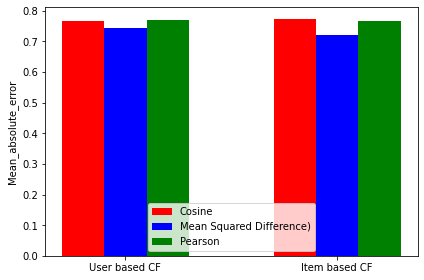

In [ ]:
labels = ['User based CF', 'Item based CF']

x = np.arange(len(labels))  # the label locations
width = 0.2

# plot data in grouped manner of bar type
plt.bar(x-0.2, plot_data['mae']['cosine'], width, color='red')
plt.bar(x, plot_data['mae']['msd'], width, color='blue')
plt.bar(x+0.2, plot_data['mae']['pearson'], width, color='green')

plt.xticks(x, labels)
plt.ylabel("Mean_absolute_error")
plt.yticks()
plt.legend(["Cosine", "Mean Squared Difference)", "Pearson"])
plt.tight_layout()

plt.show()

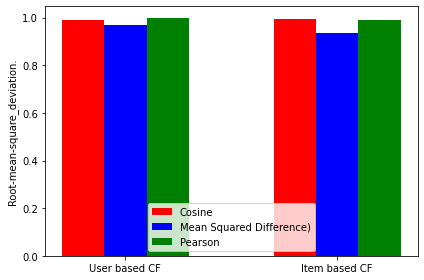

In [ ]:
labels = ['User based CF', 'Item based CF']

x = np.arange(len(labels))  # the label locations
width = 0.2

# plot data in grouped manner of bar type
plt.bar(x-0.2, plot_data['rmse']['cosine'], width, color='red')
plt.bar(x, plot_data['rmse']['msd'], width, color='blue')
plt.bar(x+0.2, plot_data['rmse']['pearson'], width, color='green')

plt.xticks(x, labels)
plt.ylabel("Root-mean-square_deviation.")
plt.yticks()
plt.legend(["Cosine", "Mean Squared Difference)", "Pearson"])
plt.tight_layout()

plt.show()

**f. Examine how the number of neighbors impacts the performances of User based 
Collaborative Filtering and Item based Collaborative Filtering? Plot your results.  
(10 points)**

In [ ]:
min_k_value = 1
mean = 99999
ucf_k_results = []

for i in range(20):
  knn_ucf = KNNBasic(sim_options={'user_based': True}, k=i)
  cv_knn_ucf = cross_validate(knn_ucf, data, measures, verbose=True, cv=5)

  curr_mean = cv_knn_ucf['test_rmse'].mean()
  if curr_mean < mean:
    mean = curr_mean
    min_k_value = i
  ucf_k_results.append(curr_mean)
  print(i)

print(min_k_value, mean)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0579  1.0606  1.0645  1.0601  1.0472  1.0580  0.0058  
MAE (testset)     0.8473  0.8521  0.8555  0.8509  0.8432  0.8498  0.0042  
Fit time          0.16    0.34    0.25    0.20    0.18    0.23    0.06    
Test time         0.76    1.40    1.22    0.78    0.89    1.01    0.26    
0
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing

In [ ]:
min_k_value = 1
mean = 99999
icf_k_results = []

for i in range(20):
  knn_ucf = KNNBasic(sim_options={'user_based': False}, k=i)
  cv_knn_ucf = cross_validate(knn_ucf, data, measures, verbose=True, cv=5)

  curr_mean = cv_knn_ucf['test_rmse'].mean()
  if curr_mean < mean:
    mean = curr_mean
    min_k_value = i
  icf_k_results.append(curr_mean)

print(min_k_value, mean)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0585  1.0672  1.0513  1.0529  1.0604  1.0581  0.0057  
MAE (testset)     0.8494  0.8562  0.8453  0.8455  0.8526  0.8498  0.0042  
Fit time          5.08    6.27    4.43    4.26    4.04    4.81    0.80    
Test time         4.09    5.70    4.10    4.34    4.24    4.49    0.61    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing s

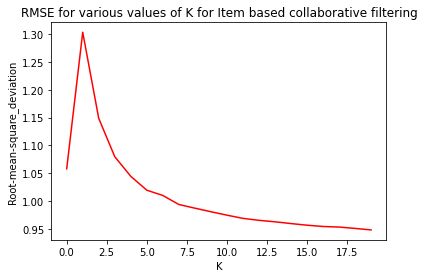

In [ ]:
plt.plot(icf_k_results, color = 'r')
plt.xlabel("K")
plt.ylabel("Root-mean-square_deviation")
plt.title("RMSE for various values of K for Item based collaborative filtering")
plt.show()

**g. Identify the best number of neighbor (denoted by K) for User/Item based 
collaborative filtering in terms of RMSE.  Is the best K of User based collaborative 
filtering the same with the best K of Item based collaborative filtering? (10 points)**

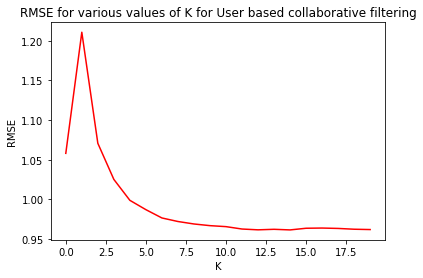

In [ ]:
plt.plot(ucf_k_results, color = 'r')
plt.xlabel("K")
plt.ylabel("RMSE")
plt.title("RMSE for various values of K for User based collaborative filtering")
plt.show()

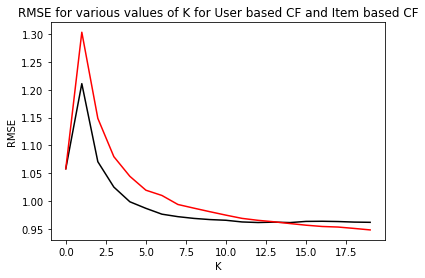

In [ ]:
plt.plot(ucf_k_results, color ='black')
plt.plot(icf_k_results, color ='red')
plt.xlabel("K")
plt.ylabel("RMSE")
plt.title("RMSE for various values of K for User based CF and Item based CF")
plt.show()